[1.5031645569620253, 1.402524544179523, 2.0253164556962027, 1.7042330951072018, 1.2745098039215685, 1.2779552715654952, 1.4853472501003613, 1.6122984626921637, 1.1138183083884443, 1.4502307185234016, 1.8846042331110466, 1.0964912280701753, 1.2944162436548223, 1.3530135301353015, 1.1111111111111112, 1.5848892748588799, 1.1319201481786376, 1.444972288202692, 1.1799410029498525, 1.329500538986705, 1.2364760432766615, 1.2165050139733684, 1.222804510084167, 1.080080234531708, 1.4035617265318443, 1.4009243212016176, 1.2143539364169735, 1.1138613861386137, 1.200160021336178, 1.178146038322113, 1.18776851149861, 1.3911723789047679, 1.2541497602360752, 1.1812981845312112, 1.191765980498375, 1.2167481808421805, 1.1820330969267139, 1.206386753400355, 1.296692838448727, 1.5980403592674677, 1.48830616583983, 1.8670996173025631, 1.5331177386513355, 1.9558435325173988, 1.6666666666666667, 1.824373631719776, 2.123456790123457, 1.9636720667648502, 2.225295448830777, 2.186700767263427, 2.413253326376206

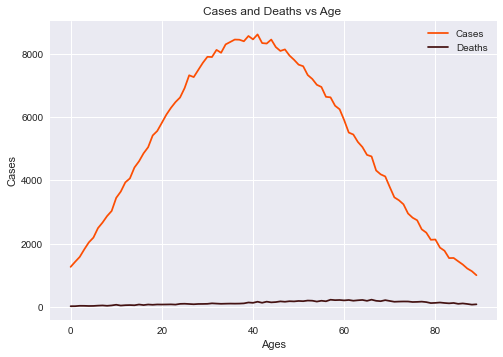

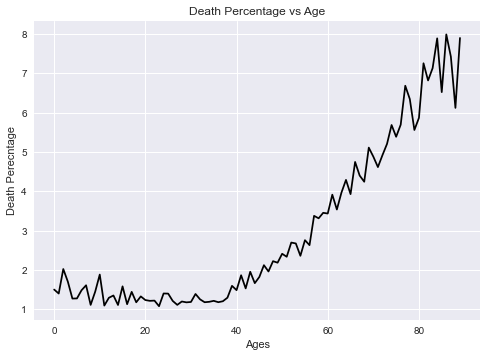

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
from collections import Counter

plt.style.use('seaborn')

covidata = pd.read_csv('given_files\COVID_Dataset.csv')

#basic plotting of age vs cases

ageser = covidata.Age
#print(ageser)
agecount = Counter(ageser)
#print(agecount)

agelist = []
for age in agecount:
    agelist.append(age)  
agelist.sort()
#print(agelist)                 #now we have all ages in order

agecases = []
for a in agelist:
    agecases.append(agecount[a])
#print(agecases)                #now we have list of cases for all ages in order


#Now finding number of deaths for each age

db2 = covidata[['Age', 'Outcome',]]
#print(db2)
deathser= db2[db2.Outcome=="Dead"]
#print(deathser)

deathagecount= Counter(deathser.Age)
#print(deathagecount)                   #Now we have count of no. of deaths for each age

deathagelist = []
for a in deathagecount:
    deathagelist.append(a)
deathagelist.sort()
#print(deathagelist)

deathcountlist = []
for e in deathagelist:
    deathcountlist.append(deathagecount[e])
#print(deathcountlist)


#To plot death percent by age

deathperclist = []
for i in range(len(agelist)):
    perc = (deathcountlist[i]/agecases[i])*100
    deathperclist.append(perc)
print(deathperclist)





plt.plot(agelist, agecases, color ="#fc4e03", label = "Cases")
plt.plot(deathagelist, deathcountlist, color ='#451313', label = "Deaths" )

plt.title("Cases and Deaths vs Age ")
plt.xlabel("Ages")
plt.ylabel("Cases")
plt.legend()

plt.show()

plt.plot(agelist, deathperclist, color = 'k', label = 'Death Percentage')
plt.title("Death Percentage vs Age")
plt.xlabel("Ages")
plt.ylabel("Death Perecntage")

plt.show()






In [15]:
import pandas as pd 

covid = pd.read_csv('given_files\COVID_Dataset.csv')

covid_loc1 = covid.sort_values(['x location','y location'])
covid_loc2 = covid.sort_values(['y location','x location']) 
covid_loc1.equals(covid_loc2)


False

In [37]:
import pandas as pd 
from matplotlib import pyplot as plt 

ctrstr = "0-00-189-2040-050101"

params = ctrstr.split('-')

x = int(params[0])                  #x

if 'd' in params[1]:                #2 ys
    params[1] = params[1].split('d')
    y1q = int(params[1][0][0])
    y1c = int(params[1][0][1])
    y2q = int(params[1][1][0])
    y2c = int(params[1][1][1])
    percbool = True
else:
    yq = int(params[1][0])               #single y
    yc = int(params[1][1])
    percbool = False

zone = int(params[2])               #zone
if zone == 400:
    allzones = True
else:
    allzones = False

age_start = int(params[3][:2])      #ages
age_end = int(params[3][2:])

time_start = int(params[4][:3])     #times
time_end = int(params[4][3:])           


from data import ages
if x == 0:
    agekey = ages.ages
    x_axis = range(age_start, age_end)


y_axis = []
for i in x_axis:
    if yq == 0:
        if yc == 0:
            y_axis.append(ages.ages[i]['total'][0])
        if yc == 1:
            y_axis.append(ages.ages[i]['db'][0])
        if yc == 2:
            y_axis.append(ages.ages[i]['ri'][0])
        if yc == 3:
            y_axis.append(ages.ages[i]['bp'][0])
        if yc == 4:
            y_axis.append(ages.ages[i]['db'][0] + ages.ages[i]['ri'][0])
        if yc == 5:
            y_axis.append(ages.ages[i]['ri'][0] + ages.ages[i]['bp'][0])
        if yc == 6:
            y_axis.append(ages.ages[i]['db'][0] + ages.ages[i]['bp'][0])
        if yc == 7:
            y_axis.append(ages.ages[i]['db'][0] + ages.ages[i]['ri'][0] + ages.ages[i]['bp'][0])
    elif yq == 1:
        y_axis.append(ages.ages[i]['total'][1])
   
        






#plt.plot(x_axis,y_axis)



<class 'int'>


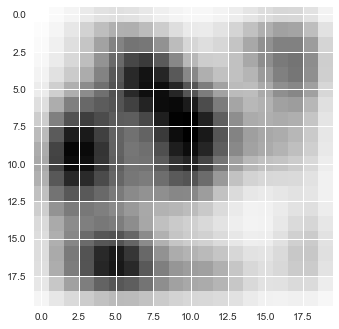

In [33]:


import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd 

pop = pd.read_csv('given_files\Population.csv')


ppl = []
for i in range(1,21):
    ppl.append(list(pop['Population'][pop['x location'] == i]))

array = np.array(ppl)
plt.imshow(array)

plt.show()



In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd 

db = pd.read_csv('given_files\COVID_Dataset.csv')

db = db.sort_values(by = ['x location', 'y location'])
coords_cases = []
for i in range (1,21):
    semi = []
    for j in range (1,21):
        semi.append(len(db[db['x location'] == i][db['y location'] == j]))
    coords_cases.append(semi)
coords_cases

cases_array = np.array(coords_cases)

[[0, 0, 0, 0, 0, 62, 370, 473, 142, 39, 0, 0, 6, 0, 0, 0, 0, 273, 1439, 1471],
 [0,
  0,
  0,
  0,
  100,
  665,
  431,
  512,
  747,
  67,
  0,
  0,
  0,
  16,
  326,
  1117,
  497,
  966,
  1759,
  1789],
 [0,
  0,
  0,
  0,
  0,
  197,
  1206,
  1269,
  339,
  1073,
  710,
  0,
  0,
  0,
  100,
  1670,
  4096,
  1873,
  937,
  645],
 [2,
  0,
  0,
  0,
  0,
  0,
  502,
  1227,
  763,
  398,
  450,
  180,
  34,
  0,
  0,
  432,
  2858,
  5047,
  2734,
  996],
 [13,
  0,
  0,
  0,
  0,
  0,
  0,
  477,
  1800,
  2187,
  2890,
  907,
  266,
  786,
  44,
  71,
  867,
  1794,
  3833,
  3662],
 [0,
  34,
  0,
  0,
  0,
  0,
  36,
  173,
  1660,
  2647,
  5279,
  5675,
  2964,
  1225,
  3483,
  1744,
  560,
  1512,
  2616,
  2377],
 [17,
  0,
  44,
  95,
  100,
  155,
  1438,
  439,
  754,
  2619,
  2741,
  6511,
  6646,
  6076,
  7206,
  5212,
  1507,
  305,
  751,
  2490],
 [6,
  8,
  95,
  164,
  203,
  1439,
  1770,
  4615,
  1191,
  1169,
  2634,
  7080,
  10053,
  3673,
  1465,
  145